Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

x = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [17]:
# Exploratory data analysis.
# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

In [18]:
# Initializing the dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
# See head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
# total nulls
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
# index
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [21]:
# data types
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [22]:
# shape
data.shape

(506, 14)

In [23]:
# summary statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
# the number of unique values for each column
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Using scikit-learn Linear Regression

2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.

Score and plot your predictions. What do these results tell us?

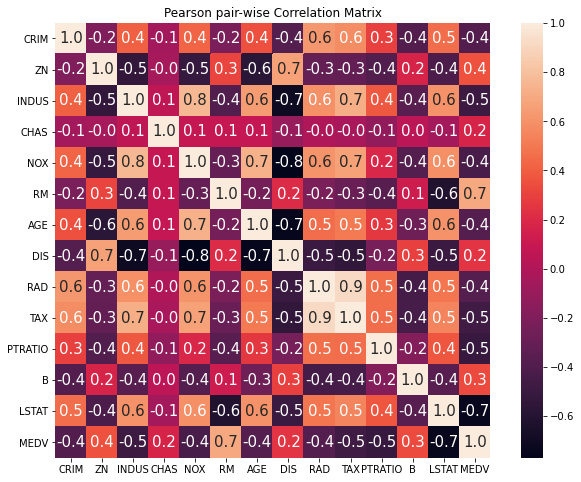

In [26]:
import seaborn as sns

# compute the pair wise correlation for all columns  
corr = data.corr()

# plot the correlation matrix to choose independent variables or predictor variables
# annot = True to print the values inside the square
plt.figure(figsize=(11,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

the correlation coefficient between MEDV and RM is 0.7 which is a strong positive correlation.
The correlation coefficient between MEDV and CRIM -0.4 is a significant negative correlation.
The correlation coefficients between prices and LSTAT/ ZN are -0.7 / -0.4, respectively, which also indicate quite significant correlations.

In [27]:
# Choose "AM", "CRIM", "LSTAT" and "ZN" as predictors
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['CRIM'], data['ZN']], columns=['LSTAT', 'RM', 'CRIM', 'ZN'])
Y = data['MEDV']

print(X.shape)
print(Y.shape)

(506, 4)
(506,)


In [29]:
# splits the training and test data set in 75% : 25%
# assign random_state to any value to ensure consistency
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 4)
(127, 4)
(379,)
(127,)


In [33]:
# Import LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

# Perform model evaluation for training set
y_train_predict = lm.predict(X_train)

# plt.plot(np.unique(Y_train), np.poly1d(np.polyfit(Y_train, y_train_predict, 1))(np.unique(Y_train)), 
#         linewidth=2, color='r')

# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(Y_train, y_train_predict, 1)

Linear Regression coefficients: [-0.57747035  5.05469619 -0.12090285  0.01855046]
Linear Regression intercept: -1.7320985234512207


/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

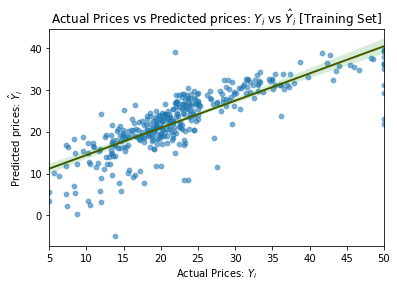

In [34]:
sns.scatterplot(Y_train, y_train_predict, alpha=0.4)
sns.regplot(Y_train, y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(np.unique(Y_train), np.unique(np.poly1d(b + m * np.unique(Y_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

In [35]:
rmse_1_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_1_train = r2_score(Y_train, y_train_predict)
 
print("The linear model performance for training set")
print('MAE:',metrics.mean_absolute_error(Y_train, y_train_predict))
print('MSE:',metrics.mean_squared_error(Y_train, y_train_predict))
print('RMSE is {}'.format(rmse_1_train))
print('R2 score is {}'.format(r2_1_train))

The linear model performance for training set
MAE: 3.90577627619562
MSE: 29.640720102641918
RMSE is 5.4443291692036695
R2 score is 0.6511635107879103


/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


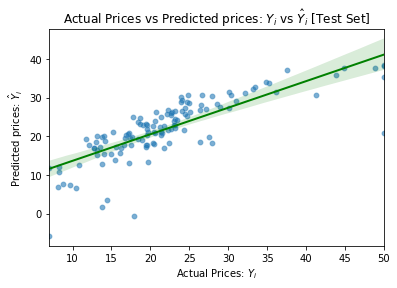

In [36]:
# model evaluation for testing set
y_test_predict = lm.predict(X_test)

sns.scatterplot(Y_test, y_test_predict, alpha=0.4)
sns.regplot(Y_test, y_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [37]:
# root mean square error of the model
rmse_1_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
 
# r-squared score of the model
r2_1_test = r2_score(Y_test, y_test_predict)

print("\nThe linear model performance for testing set")
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_predict))
print('RMSE is {}'.format(rmse_1_test))
print('R2 score is {}'.format(r2_1_test))


The linear model performance for testing set
MAE: 3.7938495367394127
MSE: 30.509463277643707
RMSE is 5.523537207048008
R2 score is 0.6303734368446607


3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)

Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [38]:
# 70/30 train/test splits

# Choose "AM", "CRIM", "LSTAT" and "ZN" as predictors
XX = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['CRIM'], data['ZN']], columns=['LSTAT', 'RM', 'CRIM', 'ZN'])
YY = data['MEDV']

print(XX.shape)
print(YY.shape)

(506, 4)
(506,)


In [39]:
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3, random_state=5)
print(XX_train.shape)
print(XX_test.shape)
print(YY_train.shape)
print(YY_test.shape)

(354, 4)
(152, 4)
(354,)
(152,)


In [40]:
lm.fit(XX_train, YY_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

# Perform model evaluation for training set
yy_train_predict = lm.predict(XX_train)

# calculating the intercept and slope for the regression line
bb, mm = np.polynomial.polynomial.polyfit(YY_train, yy_train_predict, 1)

Linear Regression coefficients: [-0.53934212  5.02139058 -0.14675642  0.02189593]
Linear Regression intercept: -2.0557695267817557


/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

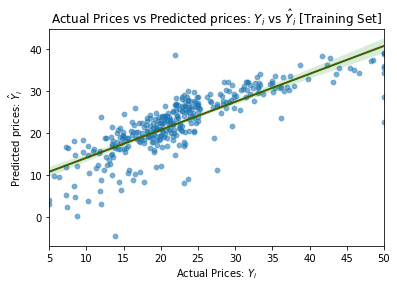

In [41]:
sns.scatterplot(YY_train, yy_train_predict, alpha=0.4)
sns.regplot(YY_train, yy_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(np.unique(YY_train), np.unique(np.poly1d(bb + mm * np.unique(YY_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

In [42]:
rmse_2_train = (np.sqrt(mean_squared_error(YY_train, yy_train_predict)))
r2_2_train = r2_score(YY_train, yy_train_predict)
 
print("The linear model performance for training set")
print('MAE:',metrics.mean_absolute_error(YY_train, yy_train_predict))
print('MSE:',metrics.mean_squared_error(YY_train, yy_train_predict))
print('RMSE is {}'.format(rmse_2_train))
print('R2 score is {}'.format(r2_2_train))

The linear model performance for training set
MAE: 3.766305506222094
MSE: 26.653992666892517
RMSE is 5.162750494348193
R2 score is 0.6661459642716905


/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


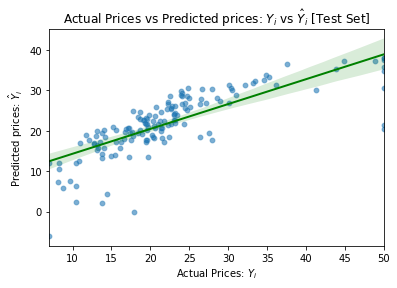

In [43]:
# model evaluation for testing set
yy_test_predict = lm.predict(XX_test)

sns.scatterplot(YY_test, yy_test_predict, alpha=0.4)
sns.regplot(YY_test, yy_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [44]:
# root mean square error of the model
rmse_2_test = (np.sqrt(mean_squared_error(YY_test, yy_test_predict)))
 
# r-squared score of the model
r2_2_test = r2_score(YY_test, yy_test_predict)

print("\nThe linear model performance for testing set")
print('MAE:',metrics.mean_absolute_error(YY_test, yy_test_predict))
print('MSE:',metrics.mean_squared_error(YY_test, yy_test_predict))
print('RMSE is {}'.format(rmse_2_test))
print('R2 score is {}'.format(r2_2_test))


The linear model performance for testing set
MAE: 4.081208469593201
MSE: 37.67744018455577
RMSE is 6.138195189512612
R2 score is 0.6037591823737795


In [45]:
# 90/10 train/test splits
# Choose "AM", "CRIM", "LSTAT" and "ZN" as predictors
XXX = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['CRIM'], data['ZN']], columns=['LSTAT', 'RM', 'CRIM', 'ZN'])
YYY = data['MEDV']

print(XXX.shape)
print(YYY.shape)

(506, 4)
(506,)


In [46]:
XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XXX, YYY, test_size=0.1, random_state=5)
print(XXX_train.shape)
print(XXX_test.shape)
print(YYY_train.shape)
print(YYY_test.shape)

(455, 4)
(51, 4)
(455,)
(51,)


In [47]:
lm.fit(XXX_train, YYY_train)

print('Linear Regression coefficients: {}'.format(lm.coef_))
print('Linear Regression intercept: {}'.format(lm.intercept_))

# Perform model evaluation for training set
yyy_train_predict = lm.predict(XXX_train)

# calculating the intercept and slope for the regression line
bbb, mmm = np.polynomial.polynomial.polyfit(YYY_train, yyy_train_predict, 1)

Linear Regression coefficients: [-0.62561854  5.08997518 -0.10482397  0.00958172]
Linear Regression intercept: -1.308778214944585


/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

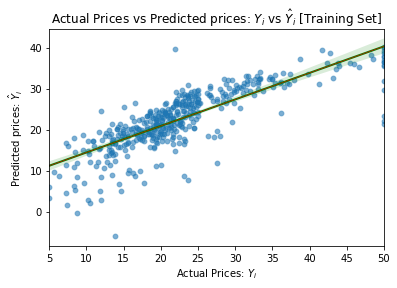

In [48]:
sns.scatterplot(YYY_train, yyy_train_predict, alpha=0.4)
sns.regplot(YYY_train, yyy_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(np.unique(YYY_train), np.unique(np.poly1d(bbb + mmm * np.unique(YYY_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

In [49]:
rmse_3_train = (np.sqrt(mean_squared_error(YYY_train, yyy_train_predict)))
r2_3_train = r2_score(YYY_train, yyy_train_predict)
 
print("The linear model performance for training set")
print('MAE:',metrics.mean_absolute_error(YYY_train, yyy_train_predict))
print('MSE:',metrics.mean_squared_error(YYY_train, yyy_train_predict))
print('RMSE is {}'.format(rmse_3_train))
print('R2 score is {}'.format(r2_3_train))

The linear model performance for training set
MAE: 3.8784845206406526
MSE: 29.91272804590137
RMSE is 5.469252969638666
R2 score is 0.646843980092138


/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


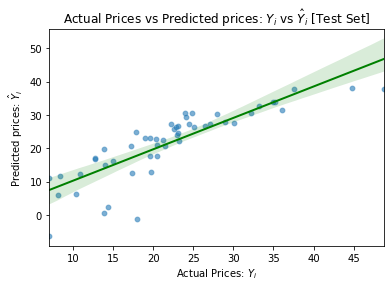

In [50]:
# model evaluation for testing set
yyy_test_predict = lm.predict(XXX_test)

sns.scatterplot(YYY_test, yyy_test_predict, alpha=0.4)
sns.regplot(YYY_test, yyy_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [51]:
# root mean square error of the model
rmse_3_test = (np.sqrt(mean_squared_error(YYY_test, yyy_test_predict)))
 
# r-squared score of the model
r2_3_test = r2_score(YYY_test, yyy_test_predict)

print("\nThe linear model performance for testing set")
print('MAE:',metrics.mean_absolute_error(YYY_test, yyy_test_predict))
print('MSE:',metrics.mean_squared_error(YYY_test, yyy_test_predict))
print('RMSE is {}'.format(rmse_3_test))
print('R2 score is {}'.format(r2_3_test))


The linear model performance for testing set
MAE: 3.991101188675738
MSE: 30.37973665797634
RMSE is 5.511781622849035
R2 score is 0.6280162536152184


4. Use k-fold cross validation varying the number of folds from 5 to 10

What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [52]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [53]:
# Create a cross-valiation with 5 folds.
lr_five = LinearRegression()
kf_five = model_selection.KFold(n_splits=5, shuffle=True)
print(np.mean(-cross_val_score(lr_five, x, y, cv=kf_five, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_five, x, y, cv=kf_five)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cross_val_score(lr_five, x, y, cv=kf_five)),
                                      np.std(cross_val_score(lr_five, x, y, cv=kf_five))))

23.711297273499735
0.7233344639290344
CV accuracy: 0.712 +/- 0.050


In [54]:
# Create a cross-valiation with 6 folds.
lr_six = LinearRegression()
kf_six = model_selection.KFold(n_splits=6, shuffle=True)
print(np.mean(-cross_val_score(lr_six, x, y, cv=kf_six, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_six, x, y, cv=kf_six)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cross_val_score(lr_six, x, y, cv=kf_six)),
                                      np.std(cross_val_score(lr_six, x, y, cv=kf_six))))

23.509406685377623
0.7062559293107386
CV accuracy: 0.714 +/- 0.038


In [55]:
# Create a cross-valiation with 7 folds.
lr_seven = LinearRegression()
kf_seven = model_selection.KFold(n_splits=7, shuffle=True)
print(np.mean(-cross_val_score(lr_seven, x, y, cv=kf_seven, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_seven, x, y, cv=kf_seven)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cross_val_score(lr_seven, x, y, cv=kf_seven)),
                                      np.std(cross_val_score(lr_seven, x, y, cv=kf_seven))))

23.38393359574057
0.6903007398635345
CV accuracy: 0.709 +/- 0.103


In [56]:
# Create a cross-valiation with 8 folds.
lr_eight = LinearRegression()
kf_eight = model_selection.KFold(n_splits=8, shuffle=True)
print(np.mean(-cross_val_score(lr_eight, x, y, cv=kf_eight, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_eight, x, y, cv=kf_eight)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cross_val_score(lr_eight, x, y, cv=kf_eight)),
                                      np.std(cross_val_score(lr_eight, x, y, cv=kf_eight))))

24.23020794052272
0.7135529424369516
CV accuracy: 0.717 +/- 0.046


In [57]:
# Create a cross-valiation with 9 folds.
lr_nine = LinearRegression()
kf_nine = model_selection.KFold(n_splits=9, shuffle=True)
print(np.mean(-cross_val_score(lr_nine, x, y, cv=kf_nine, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_nine, x, y, cv=kf_nine)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cross_val_score(lr_nine, x, y, cv=kf_nine)),
                                      np.std(cross_val_score(lr_nine, x, y, cv=kf_nine))))

23.309449825474783
0.6980371478125428
CV accuracy: 0.711 +/- 0.075


In [58]:
# Create a cross-valiation with 10 folds.
lr_ten = LinearRegression()
kf_ten = model_selection.KFold(n_splits=10, shuffle=True)
print(np.mean(-cross_val_score(lr_ten, x, y, cv=kf_ten, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_ten, x, y, cv=kf_ten)))
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cross_val_score(lr_ten, x, y, cv=kf_ten)),
                                      np.std(cross_val_score(lr_ten, x, y, cv=kf_ten))))

23.868537544766912
0.6915700582899299
CV accuracy: 0.725 +/- 0.110


What seems optimal?

10 folds seems most optimal with the highest degree of accuarcy.

How do your scores change? What is the variance like?

For each random permutation I achieved a different result, which implies the variance of the estimate for the score/risk/etc. 

What are the tradeoffs associated with choosing the number of folds?

There is a trade-off between the value of k hinged upon the size of the dataset and the runtime of the cross-validation algorithm as well as the computational cost (the larger value k, the higher the cost).

KNN Practice

In [59]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [60]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [61]:
iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [62]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Create a custom colormap

In [63]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


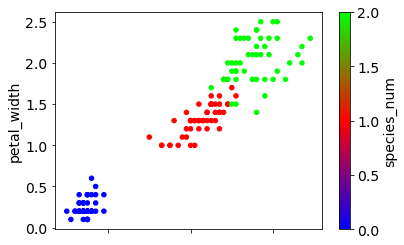

In [64]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

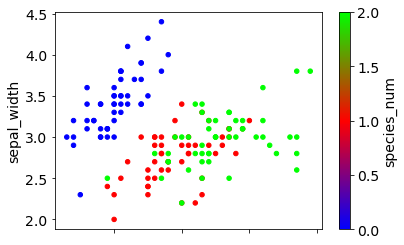

In [65]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

KNN Classification of the Iris Dataset

Create your feature matrix "X"

This will be all species measurements (sepal length, petal width, etc...)

In [66]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [67]:
X_iris = iris[feature_cols]

Create your target vector "y"

This will be the species type.

In [68]:
y_iris = iris.species_num

Make Use of Train-Test-Split

In [70]:
# 1. Import KNN From scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [71]:
# Split data in to train and test sets.
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state=99)

In [72]:
# 2. Instatiate a Model With One Neighbor
knn_one = KNeighborsClassifier(n_neighbors=1)
type(knn_one)

sklearn.neighbors._classification.KNeighborsClassifier

In [86]:
print(knn_one)

KNeighborsClassifier(n_neighbors=1)


Check the Accuracy

In [107]:
# 3. Train your model using the training set
knn_one.fit(X_iris, y_iris)

KNeighborsClassifier(n_neighbors=1)

In [108]:
# Use the test set to determine the accuracy
y_iris_pred_class = knn_one.predict(X_iris_test)
print(metrics.accuracy_score(y_iris_test, y_iris_pred_class))

1.0


In [105]:
knn_one.predict_proba(X_iris_test)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Create a Model With Five Neighbors.

In [76]:
knn_five = KNeighborsClassifier(n_neighbors=5)
knn_five.fit(X_iris_train, y_iris_train)
y_iris_pred_class = knn_five.predict(X_iris_test)
print((metrics.accuracy_score(y_iris_test, y_iris_pred_class)))

0.9210526315789473


In [109]:
knn_five.predict_proba(X_iris_test)

array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

KNeighborsClassifier()


Did it Improve?

In [ ]:
# No, it didn't improve model.

Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [80]:
scores = []
for k in range(1,151):
    knn_iris = KNeighborsClassifier(n_neighbors=k)
    knn_iris.fit(X_iris,y_iris)
    pred = knn_iris.predict(X_iris)
    score = float(sum(pred == y_iris)) / len(y_iris)
    scores.append([k, score])

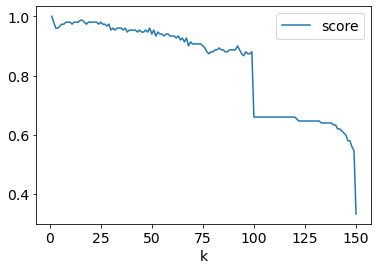

In [81]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

Bonus: According to scikit-learn Documentation, What is knn.predict_proba(X_new) Going to Do?

Calculate predicted probabilities of class membership.
Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.

In [110]:
knn_iris.predict_proba(X_iris)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.

The predict method predicts the actual class while the predict_proba method returns the class probabilities for each data points (i.e. the probability that a particular data point falls into the underlying classes).

Enrichment

Everything beyond this point is enrichment and examples using Statsmodels for linear regression.

Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [120]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [121]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                   1.38e-321
Time:                        15:16:21   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
pip install pycaret

     |████████████████████████████████| 320 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 141 kB 717 kB/s eta 0:00:01
     |████████████████████████████████| 636 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 325 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 2.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 282 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 29.0 MB 1.9 MB/s eta 0:00:01
     |██████████

In [138]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [139]:
pip install ruamel-yaml

     |████████████████████████████████| 109 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 143 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [144]:
# load dataset
from pycaret.datasets import get_data 
boston_data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [147]:
# init setup
from pycaret.regression import * 
reg1 = setup(data = boston, target = 'medv')

OSError: dlopen(/Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/Shingo_1/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [148]:
# train model
dt = create_model('dt')

NameError: name 'create_model' is not defined

Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

Tip: Check out pairplots, coefficients, and Pearson scores.

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores

Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))